In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df_tratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

df_tratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [7]:
df_tbasics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

df_tbasics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [11]:
leftjoin_rating_basics = df_tratings.set_index('tconst').join(df_tbasics.set_index('tconst'), how='left', lsuffix='1', rsuffix='2')

leftjoin_rating_basics

# left joining on the ratings and basics tables since we care about the ratings of movies more than just movies that may or may not have a
# rating in these data sets. Every rating has a movie associated with it, but not vice versa

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,,,
tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...
tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"


In [29]:
leftjoin_rating_basics.duplicated().sum() #No duplicates listed

0

In [14]:
sorted_numvotes = leftjoin_rating_basics.sort_values(by='numvotes', ascending=False)

sorted_numvotes.head(20) #top 20 movies by number of votes

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,,,
tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
tt0993846,8.2,1035358,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama"
tt1130884,8.1,1005960,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller"
tt2015381,8.1,948394,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy"
tt1431045,8.0,820847,Deadpool,Deadpool,2016,108.0,"Action,Adventure,Comedy"


In [80]:
sorted_averatings = leftjoin_rating_basics.sort_values(by='averagerating', ascending=False).loc[leftjoin_rating_basics['numvotes'] >= 50000].head(50)

sorted_averatings

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,,,
tt5813916,9.3,100568,The Mountain II,Dag II,2016,135.0,"Action,Drama,War"
tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
tt4154796,8.8,441135,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi"
tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
tt1424432,8.6,55318,Senna,Senna,2010,106.0,"Biography,Documentary,Sport"
tt4154756,8.5,670926,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
tt5074352,8.5,123638,Dangal,Dangal,2016,161.0,"Action,Biography,Drama"
tt4633694,8.5,210869,Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse,2018,117.0,"Action,Adventure,Animation"
tt2582802,8.5,616916,Whiplash,Whiplash,2014,106.0,"Drama,Music"


In [30]:
split_column_practice = leftjoin_rating_basics.copy()

split_column_practice

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,,,
tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...
tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"


In [33]:
split_column_practice = pd.concat([split_column_practice['genres'], split_column_practice['genres'].str.split(',', expand=True)], axis=1)

split_column_practice

,genres,0,1,2
tconst,,,,
tt10356526,Romance,Romance,None,None
tt10384606,Documentary,Documentary,None,None
tt1042974,Drama,Drama,None,None
tt1043726,"Action,Adventure,Fantasy",Action,Adventure,Fantasy
tt1060240,"Mystery,Thriller",Mystery,Thriller,None
...,...,...,...,...
tt9805820,Documentary,Documentary,None,None
tt9844256,"Action,Animation,Sci-Fi",Action,Animation,Sci-Fi
tt9851050,"Action,Drama",Action,Drama,None


In [63]:
split_column_practice.drop('genres', axis=1, inplace=True)

split_column_practice

,0,1,2
tconst,,,
tt10356526,Romance,None,None
tt10384606,Documentary,None,None
tt1042974,Drama,None,None
tt1043726,Action,Adventure,Fantasy
tt1060240,Mystery,Thriller,None
...,...,...,...
tt9805820,Documentary,None,None
tt9844256,Action,Animation,Sci-Fi
tt9851050,Action,Drama,None


In [66]:
split_column_practice = split_column_practice.apply(pd.Series.value_counts)

In [67]:
split_column_practice

,0,1,2
Action,6988.0,NaN,NaN
Adult,1.0,2.0,NaN
Adventure,2596.0,1221.0,NaN
Animation,962.0,614.0,167.0
Biography,3433.0,347.0,29.0
Comedy,14649.0,2096.0,545.0
Crime,2494.0,1754.0,363.0
Documentary,13962.0,3258.0,533.0
Drama,18572.0,9836.0,2380.0
Family,604.0,1679.0,1129.0


In [69]:
split_column_practice['movie_genre_total'] = split_column_practice.sum(axis=1)

split_column_practice

,0,1,2,movie_genre_total
Action,6988.0,NaN,NaN,6988.0
Adult,1.0,2.0,NaN,3.0
Adventure,2596.0,1221.0,NaN,3817.0
Animation,962.0,614.0,167.0,1743.0
Biography,3433.0,347.0,29.0,3809.0
Comedy,14649.0,2096.0,545.0,17290.0
Crime,2494.0,1754.0,363.0,4611.0
Documentary,13962.0,3258.0,533.0,17753.0
Drama,18572.0,9836.0,2380.0,30788.0
Family,604.0,1679.0,1129.0,3412.0


In [77]:
split_column_practice.sort_values(by='movie_genre_total', ascending=False) 


# total genre count for all movies in the 'basics' table, filtered out so that each movie's multiple genres are separated. Not accurate of
# the top picks though


,0,1,2,movie_genre_total
Drama,18572.0,9836.0,2380.0,30788.0
Documentary,13962.0,3258.0,533.0,17753.0
Comedy,14649.0,2096.0,545.0,17290.0
Thriller,1563.0,3048.0,3606.0,8217.0
Horror,4490.0,2397.0,787.0,7674.0
Action,6988.0,NaN,NaN,6988.0
Romance,786.0,3295.0,2508.0,6589.0
Crime,2494.0,1754.0,363.0,4611.0
Adventure,2596.0,1221.0,NaN,3817.0
Biography,3433.0,347.0,29.0,3809.0


In [85]:
top_numgenres = sorted_numvotes.head(20).copy()

top_numgenres

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,,,
tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
tt0993846,8.2,1035358,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama"
tt1130884,8.1,1005960,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller"
tt2015381,8.1,948394,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy"
tt1431045,8.0,820847,Deadpool,Deadpool,2016,108.0,"Action,Adventure,Comedy"


In [86]:
top_numgenres = pd.concat([top_numgenres, top_numgenres['genres'].str.split(',', expand=True)], axis=1)

top_numgenres

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,0,1,2
tconst,,,,,,,,,,
tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",Action,Thriller,None
tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",Adventure,Drama,Sci-Fi
tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",Drama,Western,None
tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
tt0993846,8.2,1035358,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",Biography,Crime,Drama
tt1130884,8.1,1005960,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller",Mystery,Thriller,None
tt2015381,8.1,948394,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",Action,Adventure,Comedy
tt1431045,8.0,820847,Deadpool,Deadpool,2016,108.0,"Action,Adventure,Comedy",Action,Adventure,Comedy


In [108]:
top_numgenres.rename(columns = {0:'genre 1', 1:'genre 2', 2:'genre 3'}, inplace=True)

top_numgenres


,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,genre 1,genre 2,genre 3
tconst,,,,,,,,,,
tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",Action,Thriller,None
tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",Adventure,Drama,Sci-Fi
tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",Drama,Western,None
tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
tt0993846,8.2,1035358,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",Biography,Crime,Drama
tt1130884,8.1,1005960,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller",Mystery,Thriller,None
tt2015381,8.1,948394,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",Action,Adventure,Comedy
tt1431045,8.0,820847,Deadpool,Deadpool,2016,108.0,"Action,Adventure,Comedy",Action,Adventure,Comedy


In [137]:
top_numgenres['genre 1'].value_counts()

Action       10
Adventure     5
Drama         3
Mystery       1
Biography     1
Name: genre 1, dtype: int64

In [138]:
top_numgenres['genre 2'].value_counts()

Adventure    9
Drama        3
Thriller     2
Sci-Fi       1
Mystery      1
Western      1
Family       1
Animation    1
Crime        1
Name: genre 2, dtype: int64

In [139]:
top_numgenres['genre 3'].value_counts()

Sci-Fi      7
Fantasy     4
Comedy      3
Thriller    2
Drama       1
Name: genre 3, dtype: int64

In [ ]:
top_numgenres_count = [{'Action': 10}, 
                       {'Adventure': 14},
                       {'Animation': 1},
                       {'Biography': 1},
                       {'Comedy': 3},
                       {'Crime': 1},
                       {'Drama': 7},
                       {'Family': 1},
                       {'Fantasy': 4},
                       {'Mystery': 2},
                       {'Sci-Fi': 8},
                       {'Thriller': 4},
                       {'Western': 1}]

Text(0.5, 1.0, 'Count of the Genres of the Top 20 Movies by Number of Votes')

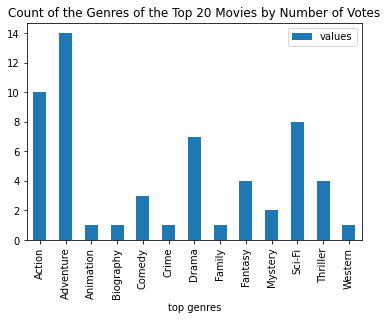

In [151]:
df_top_genres = pd.DataFrame({'top genres': ['Action', 
                                             'Adventure', 
                                             'Animation', 
                                             'Biography', 
                                             'Comedy', 
                                             'Crime',
                                             'Drama',
                                             'Family',
                                             'Fantasy',                       
                                             'Mystery',
                                             'Sci-Fi',        
                                             'Thriller',
                                             'Western'],
                              'values': [10, 14, 1, 1, 3, 1, 7, 1, 4, 2, 8, 4, 1]})

ax = df_top_genres.plot.bar(x='top genres', y='values')
plt.title('Count of the Genres of the Top 20 Movies by Number of Votes')

(6.8, 9.0, 600000.0, 2000000.0)

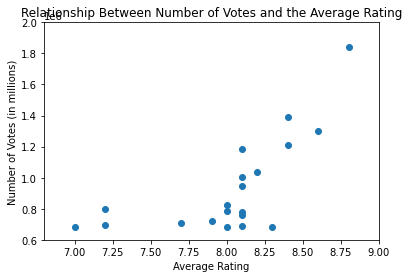

In [152]:
x = top_numgenres['averagerating']
y = top_numgenres['numvotes']
                                       
plt.scatter(x, y)
plt.title('Relationship Between Number of Votes and the Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes (in millions)')
plt.axis([6.8, 9.0, 600000, 2000000])
